In [3]:
setwd("/Users/ianwhitestone/Documents/git/rpi-security-system/analysis")

options(warn=-1) # turn warnings off
# options(warn=0) # turn warnings on

library(ggplot2)
source("/Users/ianwhitestone/Documents/git/khp-analytics/analysis/helper.R")
library(data.table)
library(dtplyr)
library(dplyr)
library(scales)
library(zoo)
library(RColorBrewer)
library(plyr)
library(RPostgreSQL)
library(lubridate)
library(gridExtra)

In [4]:
number_ticks = function(n) {function(limits) pretty(limits, n)}
palette = brewer.pal("YlGnBu", n=9)

In [21]:
df = read.csv("data.csv") %>% setDT

In [22]:
head(df)

img_name,pred,actual,pir_5,pir_10,pir_20,pir_30,pir_100,category
2018-10-30-17-02-08.106033,False,False,0,0,0,0,0.24,False-False
2018-10-30-10-58-39.388892,False,False,0,0,0,0,0.00,False-False
2018-10-30-08-48-29.191265,False,False,0,0,0,0,0.26,False-False
2018-10-30-20-25-55.820775,True,True,0,0,0,0,0.00,True-True
2018-10-29-19-28-07.691267,False,False,0,0,0,0,0.00,False-False
2018-10-30-11-04-39.809329,False,False,0,0,0,0,0.00,False-False


Registering fonts with R


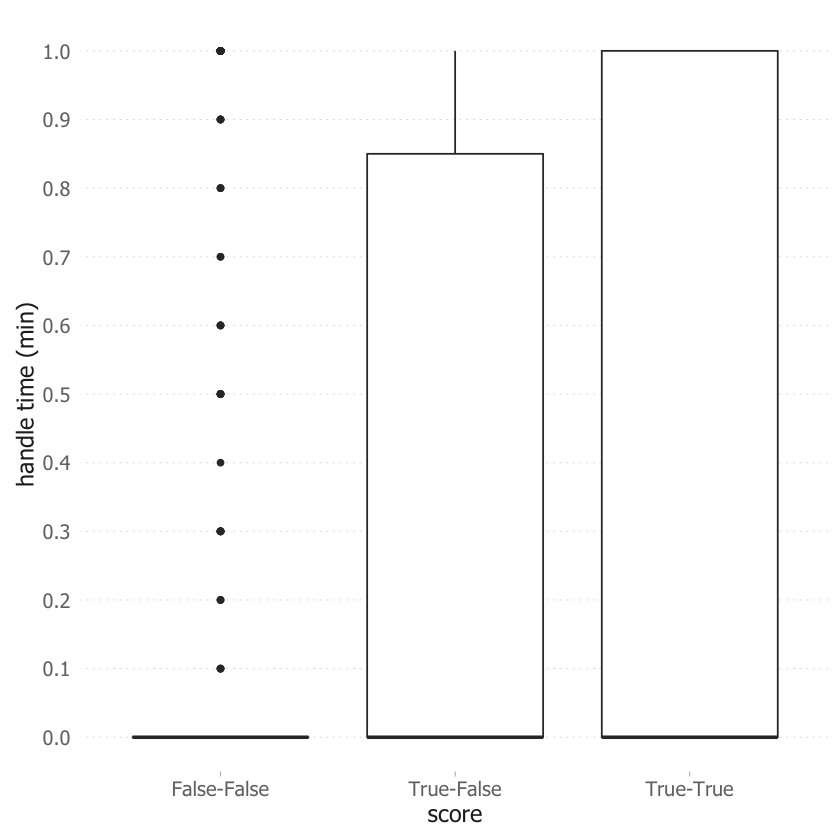

In [24]:
ggplot(df, aes(x=category, y=pir_10)) +
  geom_boxplot() + theme_dlin() +
  scale_y_continuous(breaks=number_ticks(10)) +
  labs(x='score', y='handle time (min)')


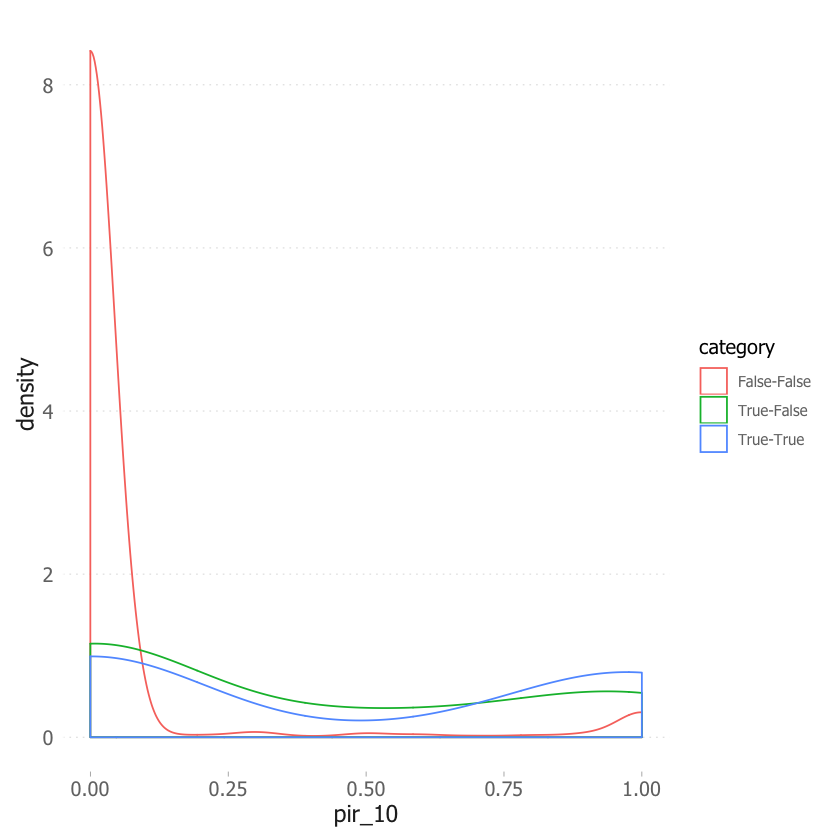

In [60]:
ggplot(df, aes(x=pir_10, colour=category)) +
    geom_density() + theme_dlin()

In [41]:
df[, label := 'True Negative']
df[category == 'True-False', label := 'False Positive']
df[category == 'True-True', label := 'True Positive']

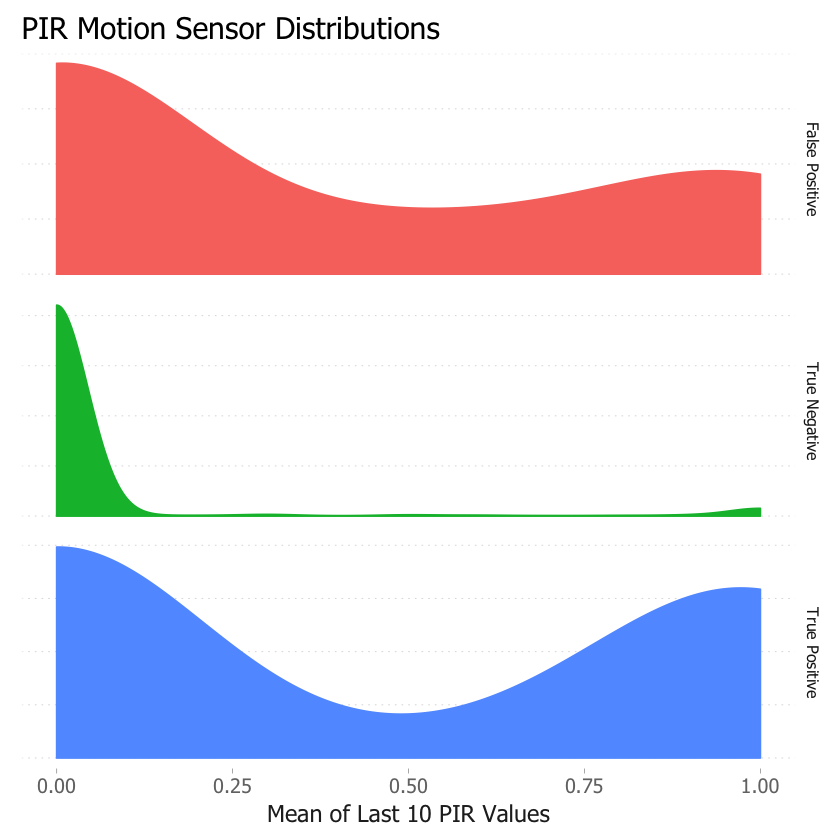

In [59]:
ggplot(df, aes(pir_10, colour=label, fill=label)) +
    geom_density() + theme_dlin() +
    facet_grid(label ~ ., scales='free') +
    labs(x='Mean of Last 10 PIR Values', title='PIR Motion Sensor Distributions') +
    theme(axis.title.y=element_blank(), axis.ticks.y=element_blank(),
          axis.text.y=element_blank(), legend.title=element_blank(),
         legend.position="none")
